In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["patch.linewidth"] = 0
sns.set_palette("muted")

<IPython.core.display.Javascript object>

### Data Exploration

In [4]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

<IPython.core.display.Javascript object>

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<IPython.core.display.Javascript object>

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<IPython.core.display.Javascript object>

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<IPython.core.display.Javascript object>

Univariate distributions

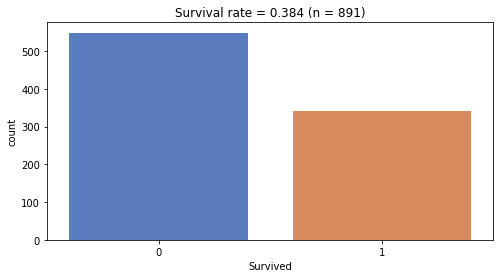

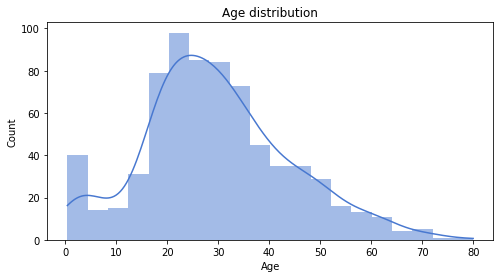

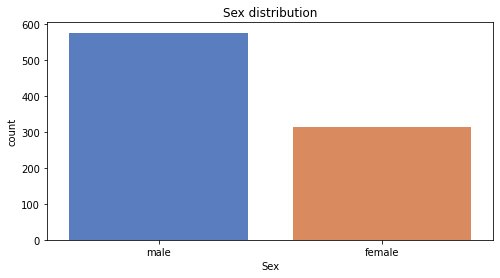

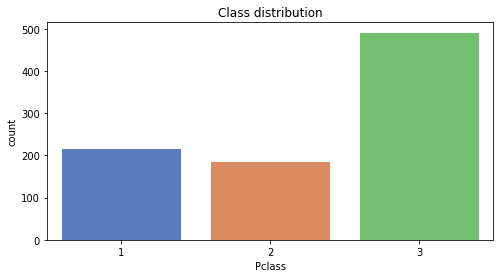

<IPython.core.display.Javascript object>

In [8]:
sns.countplot(data=train_df, x="Survived")
plt.title(
    f"Survival rate = {train_df['Survived'].mean():.3f} (n = {train_df.shape[0]})"
)
plt.show()

sns.histplot(data=train_df, x="Age", kde=True)
plt.title("Age distribution")
plt.show()

sns.countplot(data=train_df, x="Sex")
plt.title("Sex distribution")
plt.show()

sns.countplot(data=train_df, x="Pclass")
plt.title("Class distribution")
plt.show()

Multivariate distributions

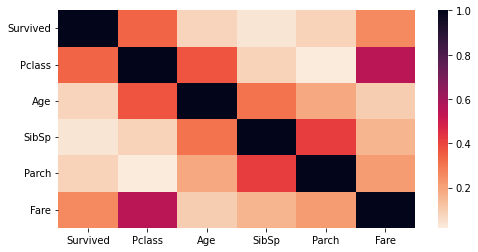

<IPython.core.display.Javascript object>

In [9]:
sns.heatmap(
    data=train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1).corr().abs(),
    cmap="rocket_r",
)
plt.show()

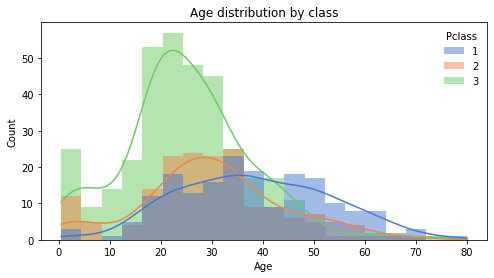

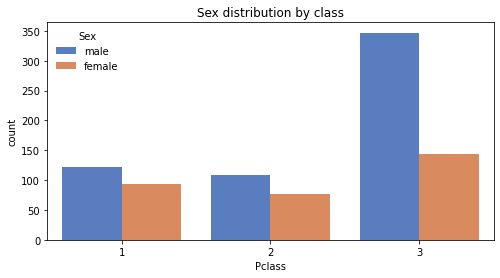

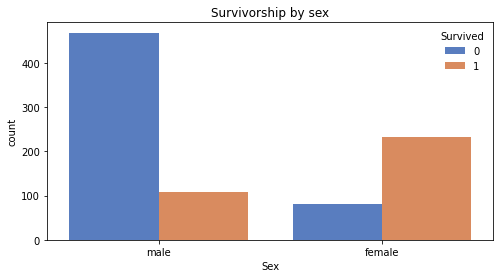

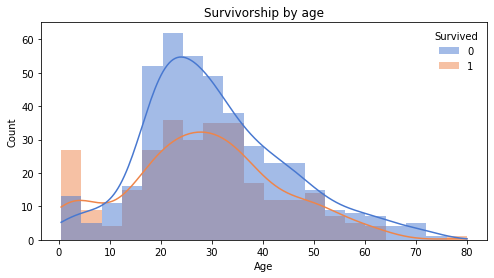

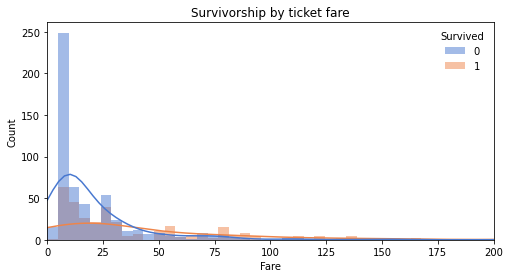

<IPython.core.display.Javascript object>

In [10]:
sns.histplot(data=train_df, x="Age", hue="Pclass", kde=True, palette="muted")
plt.title("Age distribution by class")
plt.show()

sns.countplot(data=train_df, x="Pclass", hue="Sex")
plt.title("Sex distribution by class")
plt.show()

sns.countplot(data=train_df, x="Sex", hue="Survived")
plt.title("Survivorship by sex")
plt.show()

sns.histplot(data=train_df, x="Age", hue="Survived", kde=True)
plt.title("Survivorship by age")
plt.show()

sns.histplot(data=train_df, x="Fare", hue="Survived", kde=True)
plt.xlim((0, 200))
plt.title("Survivorship by ticket fare")
plt.show()

### Feature Engineering

Combine the training and testing data for feature engineering

In [11]:
df = pd.concat([train_df, test_df.assign(Survived=-1)], ignore_index=True)

<IPython.core.display.Javascript object>

In [12]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<IPython.core.display.Javascript object>

Is there a pattern with the missing values? Maybe people we couldn't collect information from, because they didn't make it?

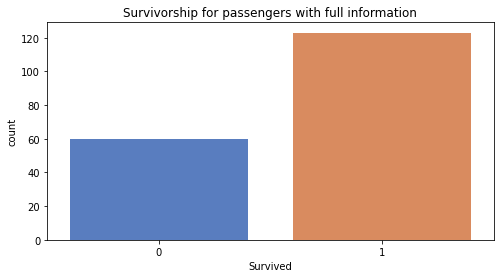

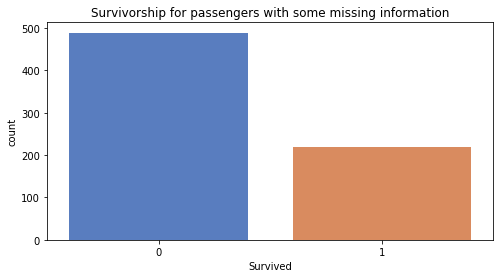

<IPython.core.display.Javascript object>

In [13]:
has_full_info = ~train_df.isna().any(axis=1)

sns.countplot(data=train_df[has_full_info], x="Survived")
plt.title("Survivorship for passengers with full information")
plt.show()

sns.countplot(data=train_df[~has_full_info], x="Survived")
plt.title("Survivorship for passengers with some missing information")
plt.show()

In [14]:
df[df["Fare"].isna() | df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
1043,1044,-1,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


<IPython.core.display.Javascript object>

Only 3 missing `Fare` and `Embarked`, do simple mean/mode imputation for these rows.

Add: 
- `fare`: the fare paid, or imputed mean
- `port_from`: the port embarked from, or imputed mode

In [15]:
df = df.assign(
    fare=lambda df: np.where(~df["Fare"].isna(), df["Fare"], df["Fare"].mean()),
    port_from=lambda df: np.where(
        ~df["Embarked"].isna(), df["Embarked"], df["Embarked"].value_counts().index[0]
    ),
)

<IPython.core.display.Javascript object>

Add: 
- `has_all_info`: True if passenger not missing any information

In [16]:
df = df.assign(
    has_all_info=lambda df: ~df.isna().any(axis=1),
)

<IPython.core.display.Javascript object>

Group the categorical feature Cabin and add a category for "unknown"

In [17]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<IPython.core.display.Javascript object>

Add: 
- `cabin_section`: the cabin section if known, else "unknown"

In [18]:
df = df.assign(
    cabin_section=lambda df: df["Cabin"].apply(
        lambda cabin_str: (
            cabin_str.split()[0][0] if not pd.isna(cabin_str) else "unknown"
        )
    ),
)

<IPython.core.display.Javascript object>

In [19]:
df["cabin_section"].value_counts()

unknown    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: cabin_section, dtype: int64

<IPython.core.display.Javascript object>

How many `Age` values are missing?

In [20]:
train_df["Age"].isna().mean(), test_df["Age"].isna().mean()

(0.19865319865319866, 0.20574162679425836)

<IPython.core.display.Javascript object>

20% missing in both the training and testing set—that's a lot of rows.

Passenger age seems informative based on the distributions, so we should try to impute a value for it.

1. Naive approach is to impute mean over all the data

2. Slightly better is computing the mean by `Pclass`, the feature with the highest correlation to `Age`

3. Slightly better still, compute the mean over multiple features and choose the features that minimize squared-error over the known ages

To impute age well, we can extract additional signal hiding in the features:
- From `SibSp` and `Parch`, we can get information about their travel party size
- From `Name`, we can extract their honorific title, which might inform age
    - For example, a "Mrs." is a married woman, and a "Master" is a young man

Add:
- `party_size`: the size of the traveling group

In [21]:
df = df.assign(
    party_size=lambda df: df["Parch"] + df["SibSp"] + 1,
)

<IPython.core.display.Javascript object>

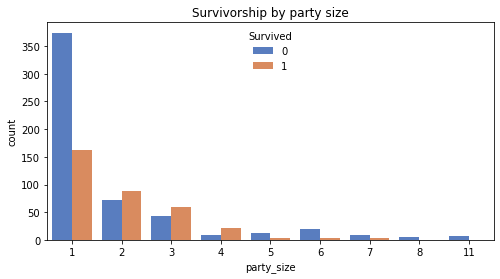

<IPython.core.display.Javascript object>

In [22]:
sns.countplot(data=df[df["Survived"] != -1], x="party_size", hue="Survived")
plt.title("Survivorship by party size")
plt.show()

Add:
- `party_size_desc`: if the passenger is traveling in a party that is "solo", "small", or "large"

This is just for age imputation—at training time we'll just use party size

In [23]:
def get_party_size_desc(n):
    if n == 1:
        return "solo"
    elif n < 5:
        return "small"
    else:
        return "large"


df = df.assign(
    party_size_desc=lambda df: df["party_size"].apply(get_party_size_desc),
)

<IPython.core.display.Javascript object>

Parse the names

Add:
- `title`: the honorific title in the name

In [24]:
df = df.assign(
    title=lambda df: df["Name"].apply(lambda name: name.split(", ")[1].split(".")[0]),
)

<IPython.core.display.Javascript object>

In [25]:
df["title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: title, dtype: int64

<IPython.core.display.Javascript object>

Add:
- `title_group`: the bucketed age group based on title

In [26]:
group_by_title = {
    # young
    "Master": "young",
    # young - middle
    "Miss": "young-adult",
    # general
    "Mr": "general",
    "Mrs": "general",
    # middle-old, distinguished titles
    "Dr": "adult",
    "Rev": "adult",
    "Major": "adult",
    "Col": "adult",
    "Capt": "adult",
    # everything else is general
}

df = df.assign(
    title_group=lambda df: df["title"].apply(
        lambda title: (group_by_title[title] if title in group_by_title else "general")
    ),
)

<IPython.core.display.Javascript object>

In [27]:
df["title_group"].value_counts()

general        965
young-adult    260
young           61
adult           23
Name: title_group, dtype: int64

<IPython.core.display.Javascript object>

In [28]:
title_group_order = ["young", "young-adult", "general", "adult"]

<IPython.core.display.Javascript object>

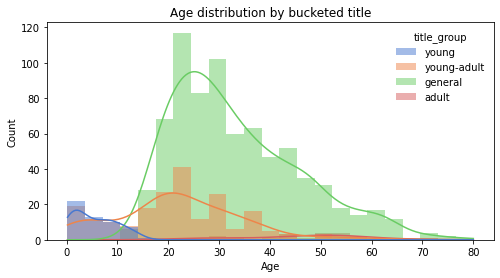

<IPython.core.display.Javascript object>

In [29]:
sns.histplot(data=df, x="Age", hue="title_group", kde=True, hue_order=title_group_order)
plt.title("Age distribution by bucketed title")
plt.show()

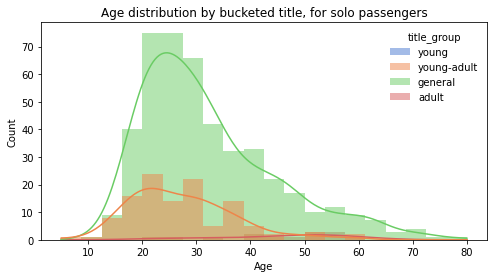

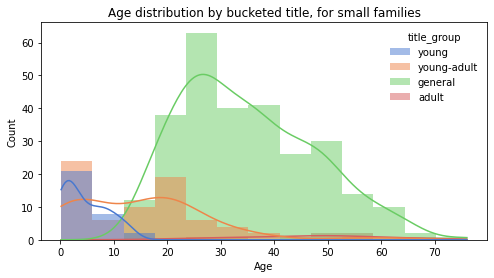

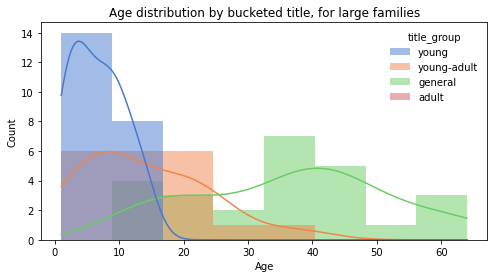

<IPython.core.display.Javascript object>

In [30]:
sns.histplot(
    data=df[df["party_size_desc"] == "solo"],
    x="Age",
    hue="title_group",
    kde=True,
    hue_order=title_group_order,
)
plt.title("Age distribution by bucketed title, for solo passengers")
plt.show()

sns.histplot(
    data=df[df["party_size_desc"] == "small"],
    x="Age",
    hue="title_group",
    kde=True,
    hue_order=title_group_order,
)
plt.title("Age distribution by bucketed title, for small families")
plt.show()


sns.histplot(
    data=df[df["party_size_desc"] == "large"],
    x="Age",
    hue="title_group",
    kde=True,
    hue_order=title_group_order,
)
plt.title("Age distribution by bucketed title, for large families")
plt.show()

Seems informative, see what combination of features does best

In [31]:
get_keyed_dict = lambda dfgb: dfgb.agg({"Age": "mean"}).to_dict()["Age"]

mean_age = df["Age"].mean()

mean_age_by_class = get_keyed_dict(df.groupby("Pclass"))
mean_age_by_title = get_keyed_dict(df.groupby("title_group"))
mean_age_by_party = get_keyed_dict(df.groupby("party_size_desc"))

multi_key_mean_ages = {
    **get_keyed_dict(df.groupby(["Pclass", "title_group"])),
    **get_keyed_dict(df.groupby(["Pclass", "party_size_desc"])),
    **get_keyed_dict(df.groupby(["title_group", "party_size_desc"])),
    **get_keyed_dict(df.groupby(["Pclass", "title_group", "party_size_desc"])),
}
multi_key_mean_ages = {k: v for k, v in multi_key_mean_ages.items() if not np.isnan(v)}


def impute_age(*args) -> float:
    def _impute(row):
        key = tuple(row[a] for a in args)
        return multi_key_mean_ages[key] if key in multi_key_mean_ages else mean_age

    return _impute


df = df.assign(
    est_age_0=mean_age,
    est_age_1=lambda df: df["Pclass"].map(mean_age_by_class),
    est_age_2=lambda df: df["title_group"].map(mean_age_by_title),
    est_age_3=lambda df: df["party_size_desc"].map(mean_age_by_party),
    est_age_4=lambda df: df.apply(impute_age("Pclass", "title_group"), axis=1),
    est_age_5=lambda df: df.apply(impute_age("Pclass", "party_size_desc"), axis=1),
    est_age_6=lambda df: df.apply(impute_age("title_group", "party_size_desc"), axis=1),
    est_age_7=lambda df: df.apply(
        impute_age("Pclass", "title_group", "party_size_desc"), axis=1
    ),
)

<IPython.core.display.Javascript object>

In [32]:
age_not_null = ~pd.isna(df["Age"])

for i in range(8):
    rmse = np.linalg.norm(df["Age"][age_not_null] - df[f"est_age_{i}"][age_not_null])
    print(f"est_age_{i}: RMSE = {rmse}")

est_age_0: RMSE = 465.9372081581121
est_age_1: RMSE = 423.97880861347096
est_age_2: RMSE = 395.86759905890335
est_age_3: RMSE = 456.9670557337017
est_age_4: RMSE = 357.18926578404415
est_age_5: RMSE = 410.78817248951174
est_age_6: RMSE = 383.5498259214031
est_age_7: RMSE = 344.3512959141311


<IPython.core.display.Javascript object>

All three—run with that

In [33]:
df = df.assign(
    est_age=lambda df: np.where(~pd.isna(df["Age"]), df["Age"], df["est_age_7"]),
).drop(
    [f"est_age_{i}" for i in range(8)],
    axis=1,
)

<IPython.core.display.Javascript object>

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,fare,port_from,has_all_info,cabin_section,party_size,party_size_desc,title,title_group,est_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,7.2500,S,False,unknown,2,small,Mr,general,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,71.2833,C,True,C,2,small,Mrs,general,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,7.9250,S,False,unknown,1,solo,Miss,young-adult,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,53.1000,S,True,C,2,small,Mrs,general,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,8.0500,S,False,unknown,1,solo,Mr,general,35.0


<IPython.core.display.Javascript object>

Examine the new features.

In [35]:
df.cabin_section

0       unknown
1             C
2       unknown
3             C
4       unknown
         ...   
1304    unknown
1305          C
1306    unknown
1307    unknown
1308    unknown
Name: cabin_section, Length: 1309, dtype: object

<IPython.core.display.Javascript object>

In [36]:
sorted(df["cabin_section"].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']

<IPython.core.display.Javascript object>

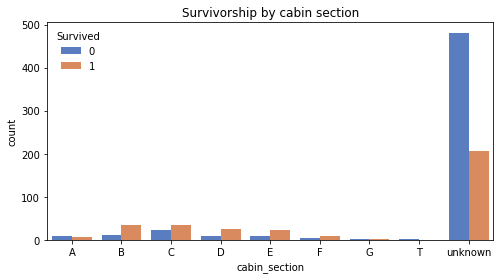

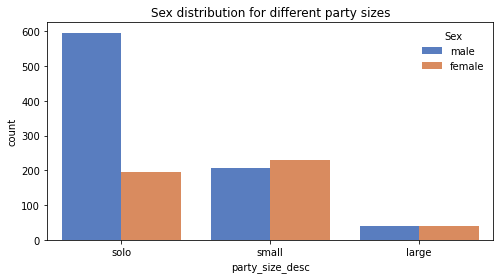

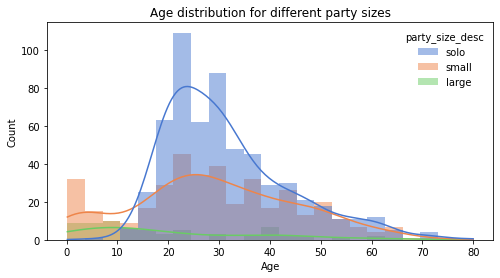

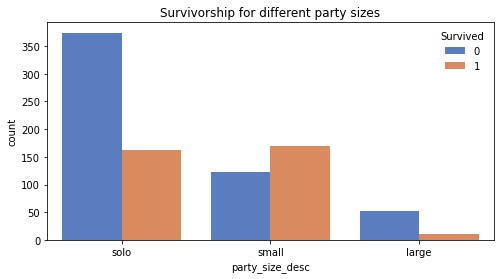

<IPython.core.display.Javascript object>

In [37]:
party_size_order = ["solo", "small", "large"]

sns.countplot(
    data=df, x="cabin_section", hue="Survived", order=sorted(df["cabin_section"].unique()), hue_order=[0, 1]
)
plt.title("Survivorship by cabin section")
plt.show()

sns.countplot(data=df, x="party_size_desc", hue="Sex", order=party_size_order)
plt.title("Sex distribution for different party sizes")
plt.show()

sns.histplot(data=df, x="Age", hue="party_size_desc", kde=True, hue_order=party_size_order)
plt.title("Age distribution for different party sizes")
plt.show()

sns.countplot(
    data=df, x="party_size_desc", hue="Survived", order=party_size_order, hue_order=[0, 1],
)
plt.title("Survivorship for different party sizes")
plt.show()


### Model

In [38]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

<IPython.core.display.Javascript object>

Set a couple baselines

In [39]:
p_survive = train_df["Survived"].mean()

baseline_acc = max(p_survive, 1 - p_survive)

print(f"Predict all don't survive: {baseline_acc:.3f}")

Predict all don't survive: 0.616


<IPython.core.display.Javascript object>

In [40]:
sex_survived_df = train_df.groupby("Sex").agg(
    {"Survived": "mean", "PassengerId": "count"}
)

p_survive_f = sex_survived_df.iloc[0][0]
n_f = sex_survived_df.iloc[0][1]

p_survive_m = sex_survived_df.iloc[1][0]
n_m = sex_survived_df.iloc[0][1]

acc_f = max(p_survive_f, 1 - p_survive_f)
acc_m = max(p_survive_m, 1 - p_survive_m)

baseline_acc_by_sex = ((n_f * acc_f) + (n_m * acc_m)) / (n_f + n_m)

print(f"Predict survive by sex only: {baseline_acc_by_sex:.3f}")

Predict survive by sex only: 0.777


<IPython.core.display.Javascript object>

Preprocess the data

In [41]:
ord_features = [
    "Pclass",
    "est_age",
    "fare",
    "has_all_info",
    "party_size",
    #     "SibSp",
    #     "Parch",
    #     "title_group",
]
cat_features = [
    "Sex",
    "port_from",
    "cabin_section",
]

train_features = ord_features + cat_features
target_feature = "Survived"

<IPython.core.display.Javascript object>

In [42]:
clean_df = pd.get_dummies(
    data=df[train_features + [target_feature]],
    columns=cat_features,
    drop_first=True,
).assign(has_all_info=lambda df: df.has_all_info.astype(np.int8))

clean_train_df = clean_df[: train_df.shape[0]]
clean_test_df = clean_df[train_df.shape[0] :]

<IPython.core.display.Javascript object>

In [43]:
X_train = clean_train_df.drop(target_feature, axis=1).to_numpy()
Y_train = clean_train_df[target_feature].to_numpy()

X_test = clean_test_df.drop(target_feature, axis=1).to_numpy()

<IPython.core.display.Javascript object>

In [44]:
kfold_cv = KFold(
    n_splits=10,
    shuffle=True,
    random_state=0,
)

metrics = ["accuracy", "roc_auc"]

<IPython.core.display.Javascript object>

Logistic Regression

In [45]:
# Scale data
scaler = StandardScaler()

X_train_ord = X_train[..., : len(ord_features)]
X_train_cat = X_train[..., len(ord_features) :]

X_train_scaled = np.hstack([scaler.fit_transform(X_train_ord), X_train_cat])

<IPython.core.display.Javascript object>

In [46]:
from sklearn.linear_model import LogisticRegression

<IPython.core.display.Javascript object>

In [47]:
%%time 

param_grid_lr = [
    dict(penalty=["none"], max_iter=[1000]),
    dict(penalty=["elasticnet"], l1_ratio=[0, 0.25, 0.5, 0.75, 1.0], solver=["saga"], max_iter=[1000]),
]

gs_lr = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_lr,
    scoring=metrics,
    n_jobs=4,
    refit="roc_auc",
)
gs_lr.fit(
    X=X_train_scaled, 
    y=Y_train,
)

results = gs_lr.cv_results_
best_idx = np.argmin(results["rank_test_roc_auc"])
print(f"Best params: {gs_lr.best_params_}\n")
print("Best accuracy     = {:.5f}".format(results["mean_test_accuracy"][best_idx]))
print("Best AUC          = {:.5f}".format(results["mean_test_roc_auc"][best_idx]))
print("\n")

Best params: {'l1_ratio': 0.5, 'max_iter': 1000, 'penalty': 'elasticnet', 'solver': 'saga'}

Best accuracy     = 0.79687
Best AUC          = 0.85497


CPU times: user 97.7 ms, sys: 63.2 ms, total: 161 ms
Wall time: 1.22 s


<IPython.core.display.Javascript object>

XGBoost

Easy to overfit on such a small dataset, so use conservative parameters

In [48]:
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

In [49]:
%%time

param_grid_xgb = dict(
    booster=["gbtree"],
    n_estimators=[50, 100, 200],
    learning_rate=[0.1],
    gamma=[0],
    max_depth=[4, 5],
    min_child_weight=[5, 10],
    max_delta_step=[0],
    sampling_method=["uniform"],
    subsample=[0.8],
    colsample_bytree=[0.8, 1],
    reg_alpha=[1, 1.5, 2],
    reg_lambda=[0, 0.5, 1],
)

gs_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric="auc"),
    param_grid=param_grid_xgb,
    scoring=metrics,
    refit="roc_auc",
    n_jobs=4,
)
gs_xgb.fit(
    X=X_train, 
    y=Y_train,
)

results = gs_xgb.cv_results_
best_idx = np.argmin(results["rank_test_roc_auc"])
print(f"Best params: {gs_xgb.best_params_}\n")
print("Best accuracy     = {:.5f}".format(results["mean_test_accuracy"][best_idx]))
print("Best AUC          = {:.5f}".format(results["mean_test_roc_auc"][best_idx]))
print("\n")

Best params: {'booster': 'gbtree', 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 200, 'reg_alpha': 1.5, 'reg_lambda': 0, 'sampling_method': 'uniform', 'subsample': 0.8}

Best accuracy     = 0.82157
Best AUC          = 0.87743


CPU times: user 3.82 s, sys: 332 ms, total: 4.16 s
Wall time: 3min 55s


<IPython.core.display.Javascript object>

Overall, best validation accuracy is XGBoost with performance:

Accuracy = 82.2%  
AUC = 0.877

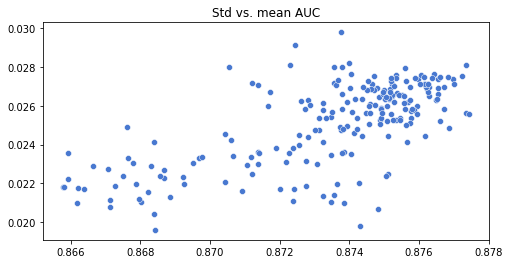

<IPython.core.display.Javascript object>

In [50]:
sns.scatterplot(
    x=gs_xgb.cv_results_["mean_test_roc_auc"],
    y=gs_xgb.cv_results_["std_test_roc_auc"],
)
plt.title("Std vs. mean AUC")
plt.show()

### Predict

In [51]:
model = gs_xgb.best_estimator_

<IPython.core.display.Javascript object>

In [52]:
Y_test = model.predict_proba(X=X_test)[:, 1]

<IPython.core.display.Javascript object>

In [53]:
test_df = test_df.assign(
    p_survived=Y_test,
    survived=(Y_test > 0.5).astype(np.int8),
)

<IPython.core.display.Javascript object>

In [54]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,p_survived,survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.064422,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.181393,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.074574,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.162978,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.332988,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.085268,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.972646,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.022291,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.085268,0


<IPython.core.display.Javascript object>

In [55]:
test_df[["PassengerId", "survived"]].rename(columns=dict(survived="Survived")).to_csv(
    "data/submission.csv", index=False
)

<IPython.core.display.Javascript object>